# Practical Work 4 

## Students
- Flavia Pittet
- Fabio Vitali

## Exercice 1 - Get the data
- Get ‘lausanne-appart.xlsx’ from moodle
- Open a new iPython notebook
- Read columns 0 (x) and column 2 (y) from the excel file ‘lausanne-appart.xlsx’
- Visualize the data




In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_excel('lausanne-appart.xlsx')
x = dataset['Living area (m2)'].values
y = dataset['rent (CHF)'].values

print(x.shape, y.shape)

(201,) (201,)


a) histogram to visualize the distribution of the renting price

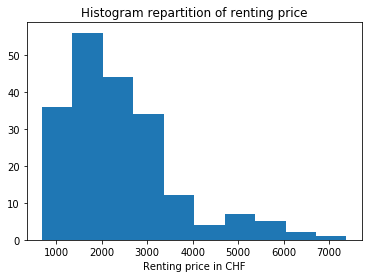

In [7]:
plt.clf()
plt.hist(y)
plt.xlabel('Renting price in CHF')
plt.title('Histogram repartition of renting price')
plt.show()

b) histogram to visualize the distribution of the living area

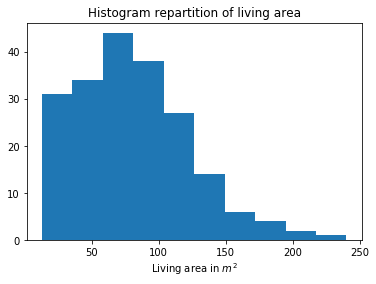

In [5]:
plt.clf()
plt.hist(x)
plt.title('Histogram repartition of living area')
plt.xlabel('Living area in $m^2$')
plt.show()

c) scatter plot of living area as a function of renting price

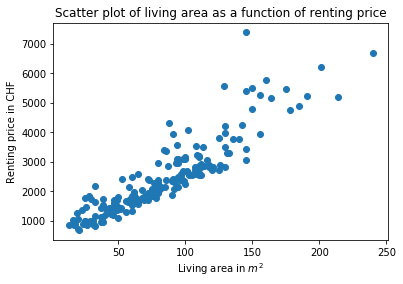

In [15]:
plt.clf()
plt.scatter(x,y)
plt.title('Scatter plot of living area as a function of renting price')
plt.xlabel('Living area in $m^2$')
plt.ylabel('Renting price in CHF')
plt.show()

### Exercice 2 -  Normal equations for linear regression

a) Implement Equation 3 assuming that x is the living area and y is the renting price. Use
numpy for the vector operations. Plot the computed line on top of the scatter plot of
exercise 1.

[240.07710727  26.33242457]


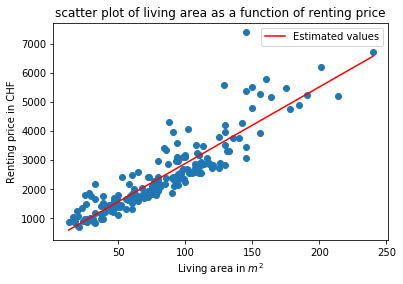

In [17]:
X = np.c_[np.ones(x.size), x]
Xt = np.transpose(X)

theta = np.dot(np.dot(np.linalg.inv(np.dot(Xt, X)), Xt), y)
print(theta)

def h(t, x):
    return t[0] + t[1] * x

plt.clf()
plt.scatter(x,y)
plt.title('scatter plot of living area as a function of renting price')
plt.xlabel('Living area in $m^2$')
plt.ylabel('Renting price in CHF')

xMax = max(x)
xMin = min(x)
#2 points only, as it's a straight line
plt.plot([xMin, xMax], [h(theta, xMin), h(theta, xMax)], color='red', label='Estimated values')
plt.legend()
plt.show()

b) Compute the overall cost value according to Equation 2 (J(teta))

In [19]:
def J(t, x, y):
    
    result = 0
    for vx, vy in zip(x, y):
        j = h(theta, vx) - vy
        result += j * j
    return result/(2*len(x))

print('Cost J(teta):', J(theta, x, y))

Cost J(teta): 138034.95779787409
